# Supervised Learning

## Linear Regression

* **Definition:** Learn a function h: X → Y where h(x) predicts y.
* **Hypothesis:** The function h(⋅).
* **Regression:** Predicting a continuous target variable (e.g., house price).
* **Classification:** Predicting a discrete target variable (e.g., house vs. apartment).

### Hypothesis Representation

* **Linear Function:**  $h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
    * $\theta_i$: Parameters/weights
    * $x_i$: Input features ($x_0 = 1$ for intercept term)
* **Vectorized Form:** $h(x) = \theta^Tx$  ($\theta$ and $x$ are vectors)
    * $n$: Number of input variables (excluding $x_0$)

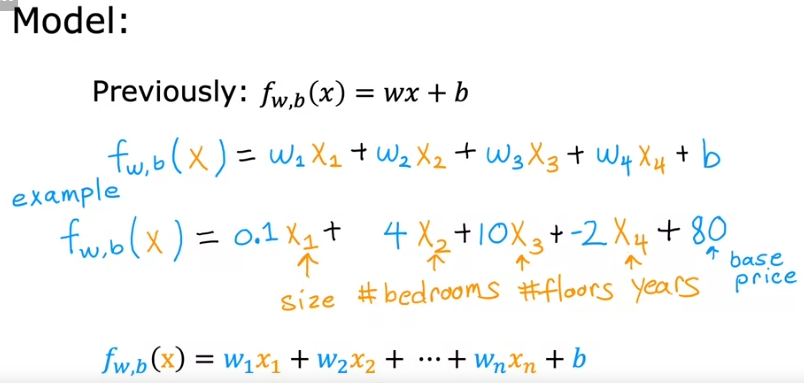

We can interpret this model like this:
- The model increases by 0.1 times for each unit of size.
- The model increases by 4 times for each unit of bedroom.
- The model decreases by 2 times for each year.
  
The base price of the real estate is 80 (when all of the variables are 0).

## Cost Function

Measures the error between predicted and actual values (e.g., Mean Squared Error).

* **Least Squares:** $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$
    * Measures how close predictions are to actual values.
    * $m$: Number of training examples

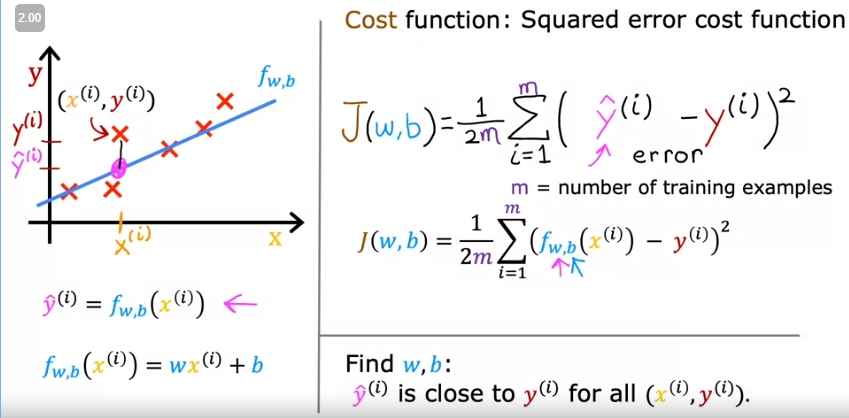
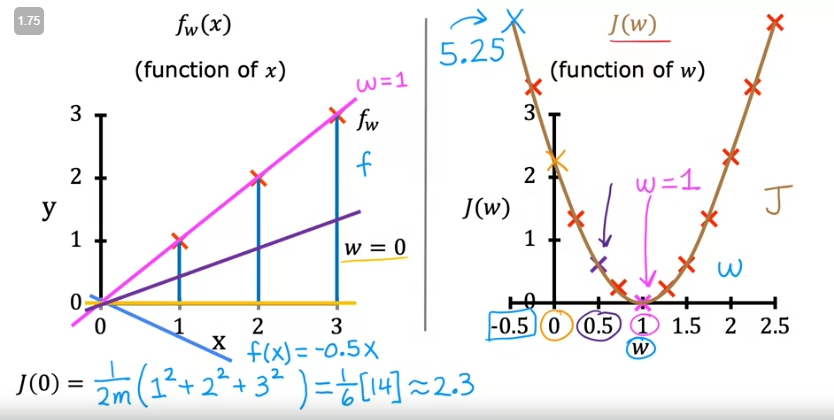

## Gradient Descent

Iterative algorithm to minimize the cost function and find optimal $\theta$ values.

* **Goal:** Minimize $J(\theta)$ by iteratively updating $\theta$.
* **General Update Rule:** $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$
    * $\alpha$: Learning rate
* **Partial Derivative:** $\frac{\partial}{\partial \theta_j}J(\theta) = \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$
* **LMS Update Rule (Single Training Example):** $\theta_j := \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$
    * Also known as Widrow-Hoff learning rule.
    * Update proportional to the error.

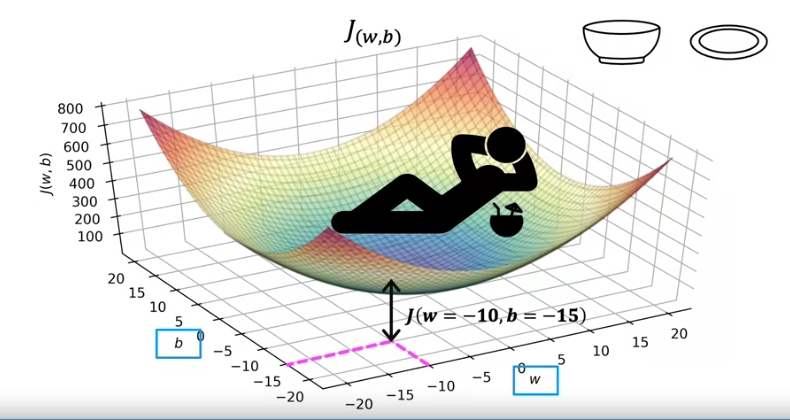

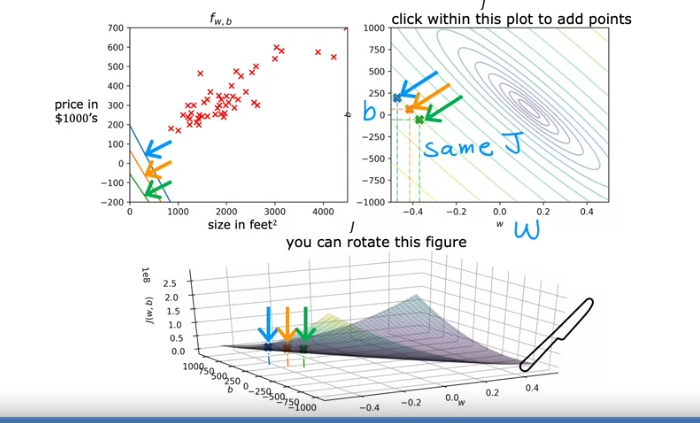

## Gradient Descent Variants

* **Batch Gradient Descent:**
    * Updates $\theta$ after looking at all training examples.
    * $\theta_j := \theta_j + \alpha \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$ (for all $j$)
    * Converges to global minimum for linear regression (convex quadratic function).
* **Stochastic Gradient Descent:**
    * Updates $\theta$ after each training example.
    * $\theta_j := \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)})) x_j^{(i)}$ (for all $j$, for each $i$)
    * Faster for large datasets, but may oscillate around the minimum.
    * Can converge to minimum with decreasing learning rate $\alpha$.

### Question
In machine learning, which optimization algorithm is typically used for non-convex optimization problems?  

> Stochastic Gradient Descent is typically used for non-convex optimization problems, as it is able to escape local minima by introducing randomness into the optimization process.

## Linear Regression Assumptions

1. **Linearity**: The relationship between the independent variables (predictors) and the dependent variable is linear.

2. **Independence**: Observations are independent of each other, meaning the errors (residuals) are not correlated across observations.

3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variables.

4. **Normality of Residuals**: The residuals (differences between observed and predicted values) should be normally distributed.

5. **No Multicollinearity**: Independent variables are not highly correlated with each other.

6. **No Autocorrelation**: There is no correlation between the residuals over time (important for time series data).


# Polynomial Regression Cheatsheet

## 1. Introduction

* **Motivation:** Extending linear regression to model non-linear relationships between variables.
* **Core Idea:** Transforming the original features into polynomial features and then applying linear regression.

## 2. Polynomial Feature Engineering

* **Transforming Features:** Creating new features by raising existing features to various powers.
    * Example:  If $x$ is a feature, polynomial features could be $x^2$, $x^3$, etc.
* **General Form:**  A polynomial regression model of degree *n* can be represented as:

    $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \epsilon$

    where:
        * $y$ is the target variable
        * $x$ is the original feature
        * $\beta_0, \beta_1, ..., \beta_n$ are the coefficients to be learned
        * $\epsilon$ is the error term
* **Example:**  For a 2nd degree polynomial (quadratic) with two original features ($x_1$ and $x_2$), the transformed features would include $x_1$, $x_2$, $x_1^2$, $x_2^2$, and potentially the interaction term $x_1x_2$.

## 3. Advantages and Disadvantages

* **Advantages:**
    * Can model non-linear relationships.
    * Relatively simple to implement and understand.
* **Disadvantages:**
    * Can overfit if the polynomial degree is too high. Careful selection of the degree and regularization techniques are important.
    * Outliers can have a significant impact on the model.
    * Can be computationally expensive for very high-degree polynomials.


# Feature scaling

## When to Use?
-   Almost always beneficial for gradient descent-based algorithms.
-   Doesn't negatively impact model performance.
-   Especially important with polynomial features and distance-based algorithms (e.g., KNN, SVM).

## What Rescaling Does

-   Transforms features to a similar scale.
-   Prevents features with larger values from dominating the learning process.
-   Speeds up gradient descent convergence.


## Types of Rescaling

### 1. Min-Max Scaling

-   **How to calculate:**
    $x_{scaled} = \frac{x}{x_{max}}$
-   **Range:** 0 to 1
-   **Effect:** Scales features to a fixed range, preserving the original distribution shape. Sensitive to outliers in the maximum value.

### 2. Mean Normalization

-   **How to calculate:**
    $x_{scaled} = \frac{x - \mu}{x_{max} - x_{min}}$
    where $\mu$ is the mean of the feature.
-   **Range:** Approximately -1 to 1.  The exact range depends on the data distribution.
-   **Effect:** Centers the data around zero and scales it.  Less sensitive to outliers in the maximum value than Min-Max Scaling but still slightly influenced.

### 3. Z-Score Standardization (Standard Scaling)

-   **Related to:** Normal Distribution
-   **How to calculate:**
    $x_{scaled} = \frac{x - \mu}{\sigma}$
    where $\mu$ is the mean and $\sigma$ is the standard deviation of the feature.
-   **Range:**  Negative to positive, centered around 0. Most values within -3 to 3.
-   **Effect:** Transforms data to have a mean of 0 and a standard deviation of 1.  Not affected by outliers as it uses standard deviation for scaling.  Assumes data is approximately normally distributed or that this distribution is beneficial.  This is often the preferred method for many machine learning algorithms.

**Importance of Feature Scaling with Polynomial Features**

-   Polynomial features can create vastly different scales between features, making feature scaling crucial for stable and efficient model training.

**Additional Notes**

* **Choosing the right method:** Z-score standardization is often a good default choice.  However, if you need values within a specific range (like 0-1 for neural network activations), min-max scaling is appropriate. For image data, simple normalization (dividing by 255) is common.
* **Scaling training and testing data:**  Crucially, the same scaling parameters (mean, standard deviation, min, max) learned from the *training* data must be applied to the *testing* data.  Never scale training and testing data independently.
